In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error 
###All the libraries!!!

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Supressing a warning about deprecated sns.distplot further down

In [3]:
data = pd.read_csv('fifa21_male2.csv')
data.shape

C:\Users\chris\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(17125, 107)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [5]:
data.columns


Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [6]:
#dropping all the far right position stats cols and gender col. stats not needed and gender is all male
data = data.drop(data.loc[:, 'LS':'Gender'].columns, axis=1)

#Droppign superfluos identifier col
data = data.drop('ID', axis = 1)

# Dropping Club as not needed and makes too many unique values
data = data.drop('Club', axis = 1)

# Droping A/W and D/W cols because unknown data
data = data.drop(['A/W', 'D/W'], axis = 1)

#Dropping all individual stat columns. Total Stats col rep[resents sum of these
data = data.drop(data.loc[:, 'Attacking':'GK Reflexes'].columns,axis=1 )
data = data.drop(data.loc[:, 'PAC':'Hits'].columns,axis=1)

# Droping cols with irregular characters. Stars in this case
data = data.drop(['W/F', 'SM', 'IR'], axis = 1)

# Dropping image files cols
data = data.drop(['Player Photo', 'Club Logo', 'Flag Photo'], axis = 1)

#loan end dropped due to high na %, position dropped due to null count and redundancy ('BP' is best position, Position is not necessary)
data = data.drop(['Loan Date End', 'Position'], axis = 1)

#dropping contract cols
data = data.drop(['Team & Contract', 'Contract'], axis=1)


In [7]:
data.columns

Index(['Name', 'Age', 'OVA', 'Nationality', 'BOV', 'BP', 'POT', 'Height',
       'Weight', 'foot', 'Growth', 'Joined', 'Value', 'Wage', 'Release Clause',
       'Total Stats', 'Base Stats'],
      dtype='object')

In [8]:
data.isna().sum()/len(data)*100 


Name              0.000000
Age               0.000000
OVA               0.000000
Nationality       0.000000
BOV               0.000000
BP                0.000000
POT               0.000000
Height            0.000000
Weight            0.000000
foot              0.000000
Growth            0.000000
Joined            0.338686
Value             0.000000
Wage              0.000000
Release Clause    0.000000
Total Stats       0.000000
Base Stats        0.000000
dtype: float64

(17125, 17)

In [10]:
#Dropping N/As of joined col
data.dropna(subset=['Joined'], inplace=True)


In [11]:
data.shape

(17067, 17)

In [12]:
#Checking and correcting data types
data.dtypes

Name              object
Age                int64
OVA                int64
Nationality       object
BOV                int64
BP                object
POT                int64
Height            object
Weight            object
foot              object
Growth             int64
Joined            object
Value             object
Wage              object
Release Clause    object
Total Stats        int64
Base Stats         int64
dtype: object

In [13]:
# Definign a function to clean and convert Height and Weight columns 
def fix_height(ht):
    
    ht_ = ht.split("'")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace('"',''))
    return (12*ft_) + in_

data['Height'] = data['Height'].apply(lambda x:fix_height(x))


data["Height"].dtypes

dtype('float64')

In [14]:
def clean_weight(wt):
    wt_ = wt.replace('lbs','')
    wt_int = int(wt_)
    return wt_int

data['Weight'] = data['Weight'].apply(lambda x:clean_weight(x))


data['Weight'].dtypes

dtype('int64')

In [15]:
# Converting 'Value' 'Wage' and 'Release Clause'

def money_launder(mon):
    clmon = mon[1:]
    if clmon[-1] == 'K':
        clmon = clmon[:-1]
        clmon = float(clmon)
        clmon = clmon*1000
    elif clmon[-1] == 'M':
        clmon = clmon[:-1]
        clmon = float(clmon)
        clmon = clmon*1000000
    return clmon


data['Value'] = data['Value'].apply(lambda x:money_launder(x))
data['Value'] = pd.to_numeric(data['Value'], errors = 'coerce')


data['Value'].dtype

dtype('float64')

In [16]:
data['Wage'] = data['Wage'].apply(lambda x:money_launder(x))
data['Wage'] = pd.to_numeric(data['Wage'], errors = 'coerce')
data['Wage'].dtype

dtype('float64')

In [17]:
data['Release Clause'] = data['Release Clause'].apply(lambda x:money_launder(x))
data['Release Clause'] = pd.to_numeric(data['Release Clause'], errors = 'coerce')
data['Release Clause'].dtype

dtype('float64')

In [18]:
# Checking column  for incorrect responses ie rihgt, letf, etc.
data['foot'].value_counts()

Right    12860
Left      4207
Name: foot, dtype: int64

In [19]:
data.head()

,Name,Age,OVA,Nationality,BOV,BP,POT,Height,Weight,foot,Growth,Joined,Value,Wage,Release Clause,Total Stats,Base Stats
0,G. Pasquale,33,69,Italy,71,LWB,69,72.0,181,Left,0,"Jul 1, 2008",625000.0,7000.0,0.0,1929,408
1,Luis García,37,71,Spain,70,CM,71,70.0,143,Right,0,"Jul 19, 2014",600000.0,7000.0,1100000.0,1906,385
2,J. Cole,33,71,England,71,CAM,71,69.0,161,Right,0,"Jan 7, 2016",1100000.0,15000.0,0.0,1770,354
4,Iniesta,36,81,Spain,82,CAM,81,67.0,150,Right,0,"Jul 16, 2018",5500000.0,12000.0,7200000.0,2014,420
5,D. Odonkor,27,66,Germany,66,RW,70,68.0,163,Right,4,"Jan 1, 2011",725000.0,5000.0,0.0,1649,360


In [20]:
#Dropping 'Growth' col. Data is unknown, values are mostly 0
data=data.drop('Growth', axis=1)

In [21]:
data.dtypes

Name               object
Age                 int64
OVA                 int64
Nationality        object
BOV                 int64
BP                 object
POT                 int64
Height            float64
Weight              int64
foot               object
Joined             object
Value             float64
Wage              float64
Release Clause    float64
Total Stats         int64
Base Stats          int64
dtype: object

In [22]:
data['Joined'] = pd.to_datetime(data['Joined'])

In [23]:
data['Value'].value_counts()

1100000.0      500
0.0            399
1000000.0      347
325000.0       342
450000.0       341
1200000.0      332
275000.0       307
550000.0       299
475000.0       298
650000.0       284
525000.0       284
350000.0       283
375000.0       278
400000.0       271
300000.0       270
1300000.0      266
425000.0       259
625000.0       249
575000.0       247
800000.0       246
750000.0       242
675000.0       240
500000.0       237
5500000.0      235
1400000.0      229
600000.0       212
900000.0       206
250000.0       197
6500000.0      193
775000.0       188
1500000.0      184
925000.0       183
1800000.0      178
725000.0       174
950000.0       168
875000.0       168
8000000.0      164
850000.0       163
160000.0       154
1600000.0      147
700000.0       146
6000000.0      144
2000000.0      144
130000.0       143
170000.0       142
2400000.0      142
825000.0       142
7000000.0      138
7500000.0      133
1900000.0      132
200000.0       131
180000.0       131
8500000.0   

In [24]:
# Drop rows where 'Value' is equal to 0
data = data.drop(data[data['Value'] == 0].index)


In [25]:
data.shape

(16668, 16)

In [26]:
data['Wage'].value_counts()

2000.0      2451
500.0       1743
3000.0      1709
1000.0      1291
4000.0      1089
5000.0       869
6000.0       649
7000.0       490
8000.0       426
9000.0       380
10000.0      283
15000.0      266
11000.0      246
12000.0      242
13000.0      228
20000.0      208
14000.0      193
16000.0      154
17000.0      151
18000.0      147
900.0        140
21000.0      129
800.0        122
30000.0      117
750.0        114
850.0        112
19000.0      112
600.0        110
650.0        109
700.0        109
950.0        106
22000.0       99
550.0         93
25000.0       91
26000.0       90
24000.0       87
23000.0       84
27000.0       71
40000.0       65
28000.0       64
29000.0       63
50000.0       59
34000.0       50
35000.0       50
31000.0       48
36000.0       47
37000.0       46
32000.0       44
33000.0       42
45000.0       40
38000.0       39
41000.0       38
42000.0       37
60000.0       33
48000.0       33
44000.0       31
46000.0       29
39000.0       29
47000.0       

In [27]:
## EDA Phase
data.describe()

,Age,OVA,BOV,POT,Height,Weight,Value,Wage,Release Clause,Total Stats,Base Stats
count,16668.000000,16668.000000,16668.000000,16668.000000,16668.000000,16668.000000,1.666800e+04,16668.000000,1.666800e+04,16668.000000,16668.000000
mean,25.145668,66.902748,67.848752,72.504380,71.347792,165.586633,2.637769e+06,10788.939885,4.699867e+06,1631.802556,361.135169
std,4.863545,6.849448,6.625329,5.723026,2.709167,15.790063,5.428706e+06,21356.829204,1.045108e+07,259.774606,40.242614
min,16.000000,45.000000,44.000000,47.000000,61.000000,110.000000,1.000000e+03,0.000000,0.000000e+00,731.000000,228.000000
25%,21.000000,62.000000,64.000000,69.000000,69.000000,154.000000,4.000000e+05,2000.000000,5.630000e+05,1493.000000,333.000000
50%,25.000000,67.000000,68.000000,72.000000,71.000000,165.000000,8.250000e+05,4000.000000,1.300000e+06,1659.000000,362.000000
75%,29.000000,72.000000,72.000000,76.000000,73.000000,176.000000,2.500000e+06,11000.000000,4.100000e+06,1812.000000,389.000000
max,47.000000,93.000000,93.000000,95.000000,81.000000,243.000000,1.055000e+08,560000.000000,2.031000e+08,2316.000000,498.000000


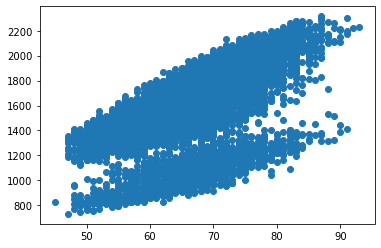

In [28]:
#Relation ship of 'OVA' (understood to be an overall stat) to 'Total Stats'

plt.scatter(x=data['OVA'], y=data['Total Stats'])
plt.show()

In [29]:
#####
####The team needs a striker. Whose the best value for money the club can suign
####Looking for the highest OVA pl;ayer that can be had for the lowest toal cost.
#### Also incvluding a regression model that predicts the cost of a player based on the OVA 

In [30]:
data.dtypes

Name                      object
Age                        int64
OVA                        int64
Nationality               object
BOV                        int64
BP                        object
POT                        int64
Height                   float64
Weight                     int64
foot                      object
Joined            datetime64[ns]
Value                    float64
Wage                     float64
Release Clause           float64
Total Stats                int64
Base Stats                 int64
dtype: object

In [31]:
# Combining value, wage, and release clause into a 'total cost' to sign the player for a season
# To make a dirwect comparison of cost vs skill. Note: Im makingsome assumptions on the data in the columns that may be factualy incorrect
data  = data.assign(total_cost=data['Value']+data['Wage']+data['Release Clause'])
data['total_cost']

0           632000.0
1          1707000.0
2          1115000.0
4         12712000.0
5           730000.0
6          8144000.0
7            61000.0
9           440000.0
10          127000.0
12         5510000.0
18          515000.0
22           46000.0
23          220000.0
26         5841000.0
29          365000.0
30         1340000.0
32         1560000.0
33         2260000.0
40          278000.0
41          785000.0
43         2420000.0
44           84000.0
45         8915000.0
46          520000.0
48           35000.0
49         2220000.0
50         2981000.0
51          431000.0
52         2156000.0
53          223000.0
55         3230000.0
58         1235000.0
59           52000.0
60          845000.0
63          136000.0
64          124000.0
65         1810000.0
66          856000.0
67          845000.0
68          583000.0
69         3908000.0
71            1000.0
75          215000.0
76         2145000.0
77         4205000.0
78         1145000.0
81         1103000.0
82         27

In [32]:
data.head()

,Name,Age,OVA,Nationality,BOV,BP,POT,Height,Weight,foot,Joined,Value,Wage,Release Clause,Total Stats,Base Stats,total_cost
0,G. Pasquale,33,69,Italy,71,LWB,69,72.0,181,Left,2008-07-01,625000.0,7000.0,0.0,1929,408,632000.0
1,Luis García,37,71,Spain,70,CM,71,70.0,143,Right,2014-07-19,600000.0,7000.0,1100000.0,1906,385,1707000.0
2,J. Cole,33,71,England,71,CAM,71,69.0,161,Right,2016-01-07,1100000.0,15000.0,0.0,1770,354,1115000.0
4,Iniesta,36,81,Spain,82,CAM,81,67.0,150,Right,2018-07-16,5500000.0,12000.0,7200000.0,2014,420,12712000.0
5,D. Odonkor,27,66,Germany,66,RW,70,68.0,163,Right,2011-01-01,725000.0,5000.0,0.0,1649,360,730000.0


In [33]:
###Creating a new dataframe with only the ST position in included from the 'BP' column. Sorted by both the OVA and Value columns
ST_stats = data[(data['BP']=='ST')].sort_values(by=['OVA', 'Value'], ascending=False)
ST_stats

,Name,Age,OVA,Nationality,BOV,BP,POT,Height,Weight,foot,Joined,Value,Wage,Release Clause,Total Stats,Base Stats,total_cost
142,Cristiano Ronaldo,35,92,Portugal,92,ST,92,74.0,183,Right,2018-07-10,46000000.0,220000.0,75900000.0,2221,464,122120000.0
2287,R. Lewandowski,31,91,Poland,91,ST,91,72.0,176,Right,2014-07-01,80000000.0,240000.0,132000000.0,2195,457,212240000.0
9331,K. Mbappé,21,90,France,91,ST,95,70.0,161,Right,2018-07-01,105500000.0,160000.0,203100000.0,2147,466,308760000.0
662,S. Agüero,32,89,Argentina,89,ST,89,68.0,154,Right,2011-07-28,53000000.0,300000.0,98100000.0,2118,439,151400000.0
3961,H. Kane,26,88,England,88,ST,89,74.0,196,Right,2010-07-01,71000000.0,220000.0,140200000.0,2172,449,211420000.0
3102,A. Griezmann,29,87,France,87,ST,87,69.0,161,Left,2019-07-12,50500000.0,290000.0,103500000.0,2288,465,154290000.0
2787,C. Immobile,30,87,Italy,87,ST,87,73.0,187,Right,2016-07-27,48500000.0,125000.0,82500000.0,2057,438,131125000.0
2290,P. Aubameyang,31,87,Gabon,87,ST,87,74.0,176,Right,2018-01-31,45000000.0,170000.0,85500000.0,2072,441,130670000.0
1373,L. Suárez,33,87,Uruguay,87,ST,87,72.0,190,Right,2020-09-25,31500000.0,115000.0,64600000.0,2316,459,96215000.0
1612,E. Cavani,32,86,Uruguay,86,ST,86,73.0,170,Right,2013-07-16,35500000.0,150000.0,65700000.0,2144,444,101350000.0


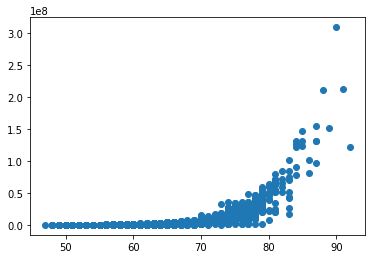

In [34]:
plt.scatter(x=ST_stats['OVA'], y=ST_stats['total_cost'])
plt.show()

In [35]:
### The scatter plut here clearly shows that Ronaldo, the highest OVA in table 
### Is a good value at a significantly lower price than the next several players in the OVA column

###This is still outside of our clubs budget though. We will keep looking

In [36]:
ST_stats.describe()

,Age,OVA,BOV,POT,Height,Weight,Value,Wage,Release Clause,Total Stats,Base Stats,total_cost
count,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2592.000000,2.592000e+03,2592.000000,2.592000e+03,2592.000000,2592.000000,2.592000e+03
mean,25.084491,66.158951,67.251157,71.755015,72.126157,170.719522,2.448841e+06,10494.309414,4.301724e+06,1633.706790,349.386574,6.761059e+06
std,4.859051,6.745941,6.428525,5.741150,2.359093,14.797946,5.519180e+06,20663.918492,1.044357e+07,174.922431,35.674093,1.591955e+07
min,16.000000,47.000000,48.000000,54.000000,63.000000,119.000000,3.000000e+04,500.000000,0.000000e+00,1166.000000,245.000000,3.075000e+04
25%,21.000000,62.000000,63.000000,68.000000,70.000000,161.000000,3.750000e+05,2000.000000,5.287500e+05,1507.000000,325.000000,9.707500e+05
50%,25.000000,66.000000,67.000000,72.000000,72.000000,170.000000,8.000000e+05,4000.000000,1.200000e+06,1626.000000,349.000000,2.047000e+06
75%,29.000000,70.000000,71.000000,75.000000,74.000000,181.000000,2.100000e+06,10000.000000,3.400000e+06,1749.000000,373.000000,5.443250e+06
max,39.000000,92.000000,92.000000,95.000000,80.000000,243.000000,1.055000e+08,300000.000000,2.031000e+08,2316.000000,473.000000,3.087600e+08


<AxesSubplot:xlabel='total_cost', ylabel='Density'>

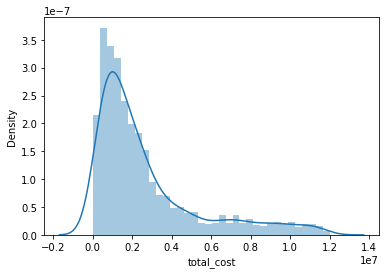

In [37]:
##Filtering the data range to remnove outliers at the highest and low end of costs
TC_IQR = np.percentile(ST_stats['total_cost'], 75) - np.percentile(ST_stats['total_cost'], 25)
u_limit = np.percentile(ST_stats['total_cost'], 75) + 1.5*TC_IQR
l_limit = np.percentile(ST_stats['total_cost'], 25) - 1.5*TC_IQR
ST_stats = ST_stats[(ST_stats['total_cost'] < u_limit) & (ST_stats['total_cost'] > l_limit)]
ST_stats = ST_stats.reset_index(drop=True)
sns.distplot(ST_stats['total_cost'])

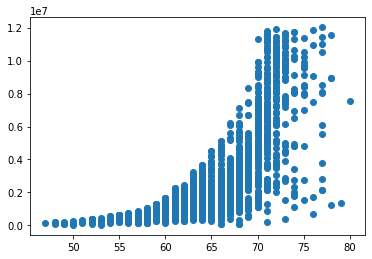

In [38]:
plt.scatter(x=ST_stats['OVA'], y=ST_stats['total_cost'])
plt.show()

<AxesSubplot:xlabel='total_cost', ylabel='Density'>

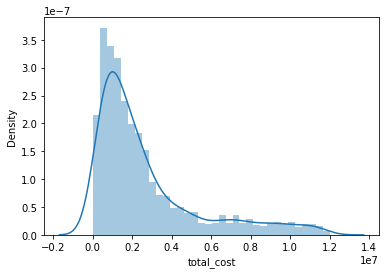

In [39]:
sns.distplot(ST_stats['total_cost'])

In [ ]:
sns.lineplot(y=ST_stats['total_cost'], x=ST_stats['OVA'])

In [ ]:
###The data here indicates that the there are good value players that 
###can be found in the high-70s OVA for fractions of 
###whgat players in the low 80x can be signed for.
###For a club willing to develope a lower talent player this can prove to be a lucrative investment




In [ ]:
###Now a linear regression model to predict the cost of a player based on OVA for market research purposes


In [ ]:
#Separating the target data as the variable Y
# and the subject data as X
y = ST_stats['total_cost']
x = ST_stats['OVA']

In [ ]:
x.shape

In [ ]:
#Reshaping the 1D array to prevent an error below
x = x.to_numpy().reshape(-1, 1)


In [ ]:
y.shape

In [ ]:
#Dividing data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=100)

In [ ]:
# Applying the model to training data
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[:10]

In [ ]:
y_test[:10]

In [ ]:
mse = mean_squared_error(predictions, y_test)
mse

In [ ]:
rmse = mse**.5
rmse

In [ ]:
r_sq = r2_score(predictions, y_test)
r_sq

In [ ]:
### The model here shows that the total_cost of signing a player can not be predicted by their OVA score.
###Other factors need to be considered 

In [42]:
#Now exporting finished dataframes to CSV for inclusion in the repo
data.to_csv('finished_data.csv')
ST_stats.to_csv('ST_only_data.csv')